# What Can we Learn From Twitter? 

## Code and Text written by: <br/>
## Cara Messina ~~ *NULab Coordinator*<br/>Alexis Yohros ~~ *Digital Teaching Integration Research Assistant*<br/>Laura Nelson ~~ *Assistant Professor of Sociology*<br/><br/>Northeastern University
### Prepared for the Economics Department <br/> December, 2018
<br/>
<br/>

![title](https://bddf794624247cea6a0b-b4761d2ba0154d0278c36dbf2b3c114d.ssl.cf1.rackcdn.com/twitter_logo_bird_transparent_png1464104142328.png)


## Introduction
For this short lecture, we will be discussing some methods in Computational Social Science, and the influence of Data Analytics in Political Science and other Social Science disciplines. Computational Social Science uses computational methods to approach social science questions; for data analytics, data is collected, stored, analyzed, and visualized to better understand patterns in human behavior and action.

In both applied politics and academic political science research, computational techniques have gained considerable traction for the purposes of analyzing causal relationships, making useful classifications, and forecasting.

## Learning Outcomes

By the end of this short exploration, you should be able to:

* Explain what it means to use Twitter as data
* List some of the ways scholars and campaigns are using Twitter data
* Understand the basic technical details behind how you get your computer to access Twitter data, structure it (and what this means!), and analyze it
* Discuss both the promises and pitfall of using Twitter as data

## Outline
1. Twitter as a Source of Data  
    * Discussion: What do you see in Twitter data?  
    * What are people doing with it?  
2. Peak Behind the Hood: Twitter scraping and text analysis basics
3. Sandbox: Collective exploration of Twitter data
4. Discussion: Promises and pitfalls of Twitter data as it relates to economics

# 1. Twitter as a Source of Data

## A. Small Group Discussion

![group](images/group.png)

Turn to your neighbors and open Twitter. Search for a keyword related to the iphone and android. Read through some of the tweets that are returned and discuss the following questions:

1. What are the main themes of the Tweets? **How did you identify this?**
2. Are people more positive about the iphone or android? How do you know?
3. What do you think a computer can do with these Tweets that you can't do yourself?
4. How do you think those making economic policy might use this information?

## B. How are others using Twitter data?

### i. Twitter mood can predict the stock market:

Johan Bollen, Huina Mao, and Xiaojun Zung. 2011. "Twitter mood predicts the stock market." *Journal of Computational Science* 2 (1): 1-8.

![textprediction](images/)





### ii. Does attending a Manne economics training program impact criminal sentencing decisions?

Elliott Ash, Daniel L. Chen, and Suresh Naidu. ["Ideas Have Consequences: The Impact of Law and Economics and American Justice."](http://elliottash.com/wp-content/uploads/2018/08/ash-chen-naidu-2018-07-15.pdf)

![politicalexposure](images/manne_sentencing.png)

# 2. Peek Behind the Hood

How do the reserachers do this? How do they access Twitter data?

They scrape it! What does this mean?

Using TAGS, which is a Twitter scraper, Cara Messina "scraped" the most recent ~5,000 Tweets that used one of these four words: election, elections, midterm, or midterms.

Let's take a look:

TAGS: https://tags.hawksey.info/ 

And what do we get? We'll use Python to see!

In [1]:
import pandas
import csv
import seaborn as sns
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib as mpl
from matplotlib import pyplot as plt
pandas.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
from sklearn.manifold import TSNE
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

pandas.options.display.float_format = '{:.2f}'.format

In [2]:
df = pandas.read_csv("./iphone-android_twitter.csv", index_col = 0)
#clean up a few things
df['user_location'][df['user_location']=='USA'] = 'United States'
df['user_location'][df['user_location']=='New York, NY'] = 'New York, USA'
df['user_location'][df['user_location']=='NYC'] = 'New York, USA'
df['text_lc'] = df['text'].str.lower()

#Take a peek at our data
df.head()

,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,text_lc
id_str,,,,,,,,,,,,,,,,,,
1067931140785197063,koiseyo0422,RT @xxxxxchikaxxxxx: 布団の中から「アレどこ置いたっけ？」って、メガネか...,Wed Nov 28 23:59:59 +0000 2018,28/11/2018 23:59:59,NaN,ja,nan,NaN,1935629022,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1070077587...,1327.00,1066.00,NaN,http://twitter.com/koiseyo0422/statuses/106793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @xxxxxchikaxxxxx: 布団の中から「アレどこ置いたっけ？」って、メガネか...
1067931139992707072,omar_tawara,RT @ThemCowboysRR: What's an iPhone? As Jason ...,Wed Nov 28 23:59:59 +0000 2018,28/11/2018 23:59:59,NaN,en,nan,NaN,4416324507,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1044054112...,300.00,505.00,NaN,http://twitter.com/omar_tawara/statuses/106793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @themcowboysrr: what's an iphone? as jason ...
1067931139501776896,blahji,RT @NFNLabs: Need help with design or developm...,Wed Nov 28 23:59:59 +0000 2018,28/11/2018 23:59:59,NaN,en,nan,NaN,263523472,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9636941622...,396.00,935.00,"Chennai, India",http://twitter.com/blahji/statuses/10679311395...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @nfnlabs: need help with design or developm...
1067931138268647424,Asam329,モイ！iPhoneからキャス配信中 -おはー https://t.co/kNuniOYWB6,Wed Nov 28 23:59:59 +0000 2018,28/11/2018 23:59:59,NaN,ja,nan,NaN,1941973520,nan,"<a href=""http://twitcasting.tv/"" rel=""nofollow...",http://pbs.twimg.com/profile_images/1037382432...,145.00,283.00,京都市,http://twitter.com/Asam329/statuses/1067931138...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",モイ！iphoneからキャス配信中 -おはー https://t.co/knunioywb6
1067931132447125504,lucasneto321,RT @MyNameMikey: Android vs iPhone https://t.c...,Wed Nov 28 23:59:57 +0000 2018,28/11/2018 23:59:57,NaN,pt,nan,NaN,918177005320929281,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1059202584...,565.00,767.00,"Rio de Janeiro, Brasil",http://twitter.com/lucasneto321/statuses/10679...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @mynamemikey: android vs iphone https://t.c...


Let's talk about what we did there.

Note:
1. The geo_coordinates column, why all the NaN? What is NaN?
2. The user_location column. What is this? What do you notice about it?
3. The time column. What is this? What date were these Tweets collected? This will be important later.


**Why did we do this? And now what? We can now quickly learn a lot about what's going on on Twitter.**

## A. How many followers on average?

Question: What do you immediately notice?

In [3]:
df[['user_followers_count', 'user_friends_count']].describe()

,user_followers_count,user_friends_count
count,8380.00,8328.00
mean,4512.58,1102.77
std,66637.53,3803.69
min,1.00,1.00
25%,86.00,133.00
50%,277.00,348.00
75%,840.00,904.25
max,3400353.00,105979.00


## B. Where are they located?

Note: Only around 20% of Tweets contain geographical metadata.

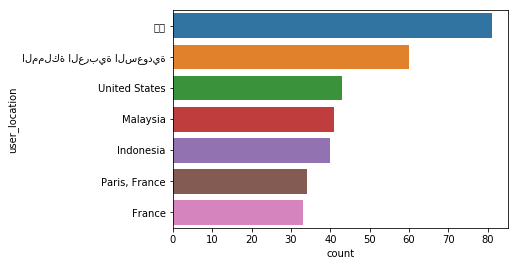

In [4]:
sns.countplot(y=df['user_location'], order=df.user_location.value_counts().iloc[:7].index)

## C. Most Frequent Words

Question: What do you conclude from this?

In [5]:
global punct_list
global stop_words

punct_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.', '/', ':', ';', 
                     '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '\n']
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
                     'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 
                     'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
                     'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
                     'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
                     'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                     'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 
                     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
                     'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                     'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
                     'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
                     'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn',
                     'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan',
                     'shouldn', 'wasn', 'weren', 'won', 'wouldn']

#Function to print the 10 most frequent words in a text
#Input: string
#Output: list of tuples


def freq_words(text):
    counts = dict()
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in punct_list])
    text_list = text.split()
    text_list = [word for word in text_list if word not in stop_words]
    for word in text_list:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1

    freq_words = []
    for key, val in counts.items():
        freq_words.append((val, key))
    freq_words.sort(reverse=True)
    return(freq_words[:50])

text = (' '.join([t for t in df['text'].tolist()]))

freq_words(text)

[(4665, 'iphone'),
 (4358, 'rt'),
 (1306, 'android'),
 (1105, 'de'),
 (811, 'xs'),
 (776, '2'),
 (758, '-'),
 (724, 'amp'),
 (722, 'xr'),
 (671, 'vous'),
 (581, 'en'),
 (565, 'x'),
 (540, '⚡️'),
 (459, 'giveaway'),
 (448, 'us'),
 (445, 'que'),
 (444, 'apple'),
 (434, '1'),
 (430, 'et'),
 (410, 'max'),
 (400, 'bf'),
 (388, 'gagner'),
 (386, 'tu'),
 (370, 'j’en'),
 (370, 'avez'),
 (365, 'un'),
 (357, 'arbiphone'),
 (355, 'و'),
 (352, 'à'),
 (349, 'hours'),
 (348, 'ends'),
 (345, 'على'),
 (338, 'aljabrrentacar'),
 (338, 'aljabrkia'),
 (338, 'aljabrfinancing'),
 (335, 'dia'),
 (331, 'il'),
 (330, 'la'),
 (325, 'dah'),
 (319, 'sur'),
 (319, 'phone'),
 (313, 'tak'),
 (307, 'ريتويت'),
 (304, 'plus'),
 (297, 'app'),
 (296, 'giveawayxtreme'),
 (296, 'chances'),
 (288, 'follow'),
 (285, '24'),
 (278, 'join')]

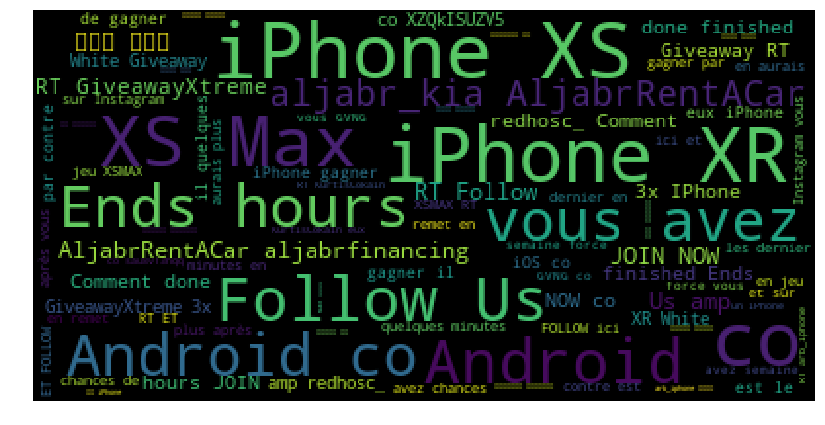

In [6]:
#word cloud using bigrams (two words in a row)

STOPWORDS.add('https')

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          collocations = True,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42,
                         ).generate(text)

fig = plt.figure(1, figsize=(14,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## D. Sentiment Analysis

In [7]:
def polarity(text):
    text_blobbed = TextBlob(text)
    return text_blobbed.sentiment.polarity

In [8]:
def subjectivity(text):
    text_blobbed = TextBlob(text)
    return text_blobbed.sentiment.subjectivity

In [9]:
df['polarity'] = df['text'].apply(polarity)

df['subjectivity'] = df['text'].apply(subjectivity)

What does 'polarity' and 'subjectiviy' mean? We can look at the TextBlob documentation to see how they calculated it (it's open source, no hidden or black box algorithsm!). But let's take a look.

Questions to think about as we look at these tweets:

1. Are these measures accurate? That is, do they relfect how you would read a Tweet as a human?
2. If not, why not? What else would the computer need to be more accurate?

#### Tweets coded as "positive":

In [10]:
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[2]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[3]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[20]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[7]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[21]['text']+'\n')

The best Android smartphone of 2018 is...! https://t.co/jtCpV1dWbN

The 15 Best iPhone X Apps of 2018 https://t.co/SBu6n8FC7l

RT @cultofmac: iPhone XR isn’t a dud; It’s Apple’s best selling model https://t.co/lyITd9MmfT by @edfromfreelance https://t.co/mmq9VouacJ

RT @HTechGiveaways: #GIVEAWAY 🍀

📱 IPHONE X 64 GO 📱

To win 🎁

RT this Tweet 🔁

Follow @HTechGiveaways ✅ &amp; Actives the notifications 🔔

Tag your friends and comment « done » 🤝

End in 2 weeks⏳to be actives ! 🤑 https://t.co/tx8hTAcVOd

RT @PlatterOfGold: Looking for the best tools to convert a website &amp; blog to android apps? Check this out... https://t.co/RhLLemccNP #Webdesign #bloggers #AndroidDev #Android #androidapps #Apps @appsbuilder @createmyfreeapp @appsbar @AppyPieInc @mobincube @BuildFire @appsgeyser @AppYet  @IbuildappB https://t.co/ij1877s2xb



#### Tweets coded as "negative":

In [11]:
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[1]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[5]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[9]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[10]['text']+'\n')

RT @arsenalite82: @LTHlondon @LBC The way some carry on... "You must feel sorry for the adolescent who's thrown acid in somebody's face/punctured arteries with a lethal blade, so that they can obtain an iPhone!!! They don't have any youth clubs!"

Look at how boring Bulma's designs became after After android saga https://t.co/2QTP7fFul1

I really hate when people ask me for directions... I know you got an iPhone Sally

i hate whoever said you can turn ur iPhone on if you hold all the buttons at once sm https://t.co/JXzHzaeIfh



In [12]:
#Summary statistics

df[['polarity', 'subjectivity']].describe()

,polarity,subjectivity
count,8451.00,8451.00
mean,0.04,0.16
std,0.20,0.29
min,-1.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.27
max,1.00,1.00


### 1. Comparisons:

#### a. By Location

In [13]:
def compare_metrics_column(df, mystring1, mystring2):
    polarity_title1 = 'polarity: %s' % mystring1
    subjectivity_title1 = 'subjectivity: %s' % mystring1
    polarity_title2 = 'polarity: %s' % mystring2
    subjectivity_title2 = 'subjectivity: %s' % mystring2
    df1 = df[['polarity', 'subjectivity']][df['user_location']==mystring1].describe()
    df1.rename(columns={'polarity': polarity_title1, 'subjectivity': subjectivity_title1}, inplace=True)
    df2 = df[['polarity', 'subjectivity']][df['user_location']==mystring2].describe()
    df2.rename(columns={'polarity': polarity_title2, 'subjectivity': subjectivity_title2}, inplace=True)
    compare = df1.join(df2)
    compare = compare[[polarity_title1, polarity_title2, subjectivity_title1, subjectivity_title2]]
    return compare

In [14]:
def compare_metrics_string(df, mystring1, mystring2):
    polarity_title1 = 'polarity: %s' % mystring1
    subjectivity_title1 = 'subjectivity: %s' % mystring1
    polarity_title2 = 'polarity: %s' % mystring2
    subjectivity_title2 = 'subjectivity: %s' % mystring2
    df1 = df[['polarity', 'subjectivity']][df['text_lc'].str.contains(mystring1)].describe()
    df1.rename(columns={'polarity': polarity_title1, 'subjectivity': subjectivity_title1}, inplace=True)
    df2 = df[['polarity', 'subjectivity']][df['text_lc'].str.contains(mystring2)].describe()
    df2.rename(columns={'polarity': polarity_title2, 'subjectivity': subjectivity_title2}, inplace=True)
    compare = df1.join(df2)
    compare = compare[[polarity_title1, polarity_title2, subjectivity_title1, subjectivity_title2]]
    return compare

In [15]:
compare_metrics_column(df, 'United States', 'Paris, France')

,polarity: United States,"polarity: Paris, France",subjectivity: United States,"subjectivity: Paris, France"
count,43.00,34.00,43.00,34.00
mean,0.07,0.01,0.27,0.07
std,0.16,0.15,0.28,0.19
min,-0.30,-0.56,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.29,0.00
75%,0.14,0.00,0.45,0.00
max,0.45,0.43,0.80,0.85


#### b. By Product Mentioned

In [16]:
compare_metrics_string(df, 'iphone', 'android')

,polarity: iphone,polarity: android,subjectivity: iphone,subjectivity: android
count,6329.00,2068.00,6329.00,2068.00
mean,0.04,0.05,0.16,0.20
std,0.19,0.22,0.29,0.32
min,-1.00,-1.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.20,0.45
max,1.00,1.00,1.00,1.00


## E. Word Vector Models

We can get fancy too!

In [17]:
#lowercase and remove all non-letter characters
#helpful w2v: https://www.kaggle.com/twistedtensor/basic-word2vec-using-gensim 

df['text_wv'] = df['text'].str.replace('[^a-zA-Z]',' ').str.lower()
df['text_wv'] = df['text_wv'].str.split()
model = Word2Vec(df['text_wv'])

### Look for words that are similar to a word or phrase

In [18]:
iphone_new = model.wv.most_similar(positive=['iphone','new'])

#what words are used in the same context as 'trump' and 'liar'?
iphone_new

[('brand', 0.9328752756118774),
 ('inch', 0.9116655588150024),
 ('kenftottokaji', 0.906836748123169),
 ('sparkly', 0.904114305973053),
 ('macrumors', 0.8809882402420044),
 ('sticker', 0.8805214166641235),
 ('has', 0.8785431385040283),
 ('marketing', 0.8667027950286865),
 ('colors', 0.8651758432388306),
 ('breakthrough', 0.8634732961654663)]

In [19]:
android = model.wv.most_similar(positive=['iphone'])
android

[('pro', 0.8468660116195679),
 ('bike', 0.8064395189285278),
 ('quad', 0.7924492359161377),
 ('macrumors', 0.7852872014045715),
 ('xs', 0.7728299498558044),
 ('max', 0.7652127742767334),
 ('macbook', 0.7611792087554932),
 ('wrapped', 0.7560110092163086),
 ('fernnymumu', 0.7479967474937439),
 ('dc', 0.7478495836257935)]

### Look for themes

In [20]:
X = model[model.wv.vocab]
Bigmodel = Word2Vec(df['text_wv'], size=100, window=40, min_count=100, workers=4)

#What words are used in the same context as 'collusion'?
Bigmodel.wv.most_similar(positive=['apple'])

/home/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('selling', 0.943159818649292),
 ('best', 0.915685772895813),
 ('company', 0.8805772066116333),
 ('xr', 0.8325799703598022),
 ('store', 0.8219134211540222),
 ('podoron', 0.7811044454574585),
 ('most', 0.7727562785148621),
 ('w', 0.7617450952529907),
 ('has', 0.7610878348350525),
 ('is', 0.7404888868331909)]

In [21]:
#TSNE https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


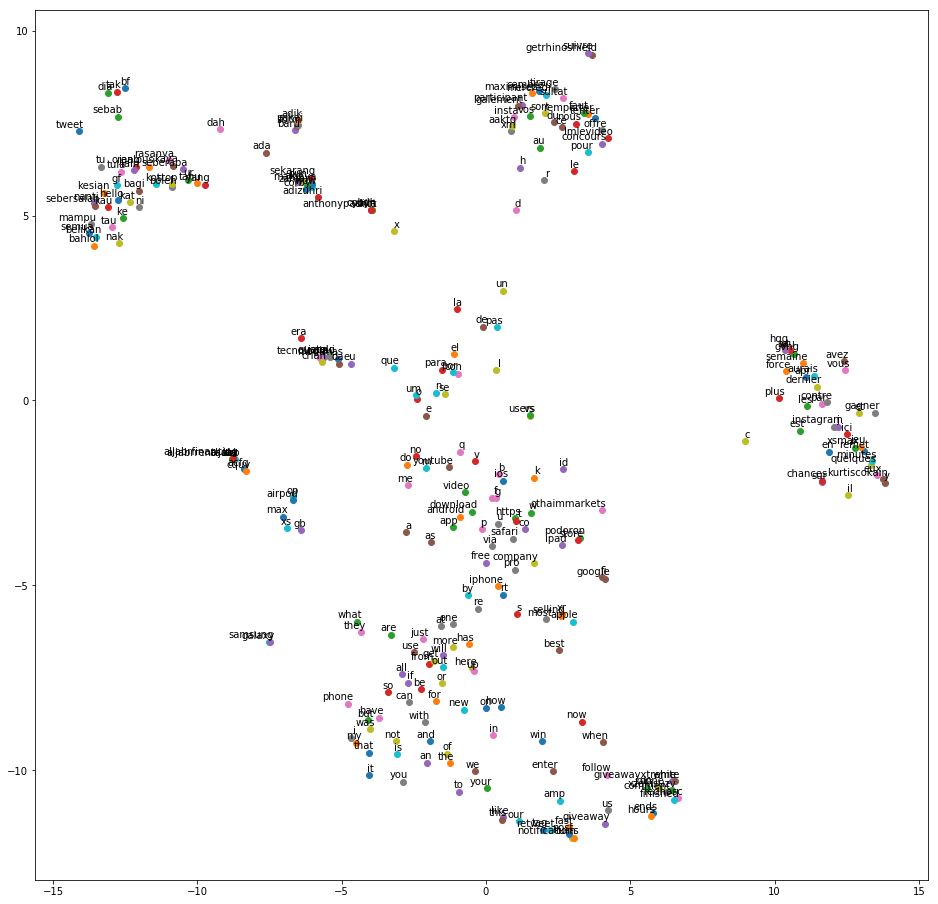

In [22]:
tsne_plot(Bigmodel)

# 3. Sandbox Time!

I want to explore the data with you. How would you explore these Tweets? You tell me what to do, I'll code it.

Possible analyses:

* Compare subjectivity and polarity using other categories of metadata (e.g., number of followers, etc.)
* Compare subjectivity and polarity using other keywords
* Compare more frequent words based on metadata categories
* Explore different keywords using the word vector model

Question: What is metadata? What are the metadata categories in this dataset?

In [23]:
#As a reminder, here are our metadata categories
df.columns.values

array(['from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'text_lc',
       'polarity', 'subjectivity', 'text_wv'], dtype=object)

In [24]:
# New code here!



# 4. Promises and Pitfalls

## Group Discussion:

What do you now see as the promises and pitfalls of using Twitter as data for campaigns? Briefly discuss with those around you, and then we'll have a larger group discussion.

## My thoughts:

## Promises:

* Real-Time Data
* Large Scale
* Fast
* "Found data", or not gathered via interference from a researcher

## Pitfalls:

* Different platforms, different uses, different people (not representative)
* Can be volatile: *when* you collect your Tweets matters
* Non-sophisticated algorithms - irony, sarcasm, humor
* Bots
* Examples below:

![title](https://mobloggy.com/images/Social-Media-Explained-with-Coffee.png)




https://www.businessinsider.com/social-media-demographics-the-identity-of-each-major-social-network-2013-9

![title](https://amp.businessinsider.com/images/523b787c69bedda311647578-750-563.jpg) 

![title](https://amp.businessinsider.com/images/523b81ec69bedd662064757f-750-563.jpg) 


## Want to learn more?

If you are interested in Computational Social Science, data analytics, ethical implications, and any of the topics we covered today, we encourage you to begin looking at potential courses or minors you might pursue!

- Computational Social Science minor
- Digital Minor
- Combined major in Computer Science and CSSH
- Other courses you might take: DS 2000/DS 20001 (Data Science) 


### Follow the NULab for workshops, events, potential courses, and more!

- https://web.northeastern.edu/nulab/ 
- @NUlabTMN on Twitter

### Our Contact Information
- Laura Nelson (l.nelson@northeastern.edu), Department of Sociology and Anthropology
- Cara Messina (messina.c@husky.neu.edu), NULab Coordinator: Office Hours: 409 Nightingale Hall, Tuesdays 12-1
- Alexis Yohros (yohros.a@husky.neu.edu), Digital Teaching Integration RA